This notebook contains the code used to geenrate Graph statistics, Portfolio metrics plots, mmd plots, lasso and SVM classifications. The Notebook loads graphs generated using Generate_graphs_case_1.py and paper_1_compare_graphs.py.

In [10]:
import pickle
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import sys
import seaborn as sns

from matplotlib import cm


# add path to other folders, to import
import sys, os
sys.path.append(os.path.abspath(".."))
from util import plot_avg_degree, plot_G_density, plot_G_signs, fetch_raw_data, avg_degree, color_dark, cnt_pos_neg, plot_weight_signs, color_light

Load raw data

2014-10-01 00:00:00
2022-02-01 00:00:00


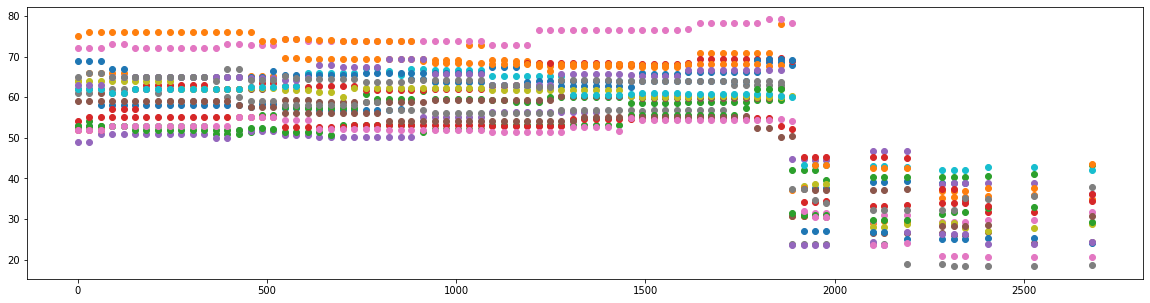

In [11]:
price_df, esg_pivot, sector_classification = fetch_raw_data("C:/Users/User/Code/MMD_Graph_Diversification/")
ind = esg_pivot.loc[:,np.isin(esg_pivot.columns, sector_classification['Energy'])]

fig, ax = plt.subplots(1,1, figsize = (20,5))
for i in range(ind.shape[1]):

    ax.scatter(range(ind.shape[0]),ind.iloc[:,i])

In [12]:
gp_esg_stock = pd.read_pickle('../data/tidy/gp_esg_stock_data_frame.pkl')
gp_esg_stock.index

Index([2014-10-01, 2014-10-02, 2014-10-03, 2014-10-04, 2014-10-05, 2014-10-06,
       2014-10-07, 2014-10-08, 2014-10-09, 2014-10-10,
       ...
       2022-01-23, 2022-01-24, 2022-01-25, 2022-01-26, 2022-01-27, 2022-01-28,
       2022-01-29, 2022-01-30, 2022-01-31, 2022-02-01],
      dtype='object', name='date', length=2681)

# Check Graph statistics and portfolio metrics

Select study: all = global portfolio.

In [15]:
study = 'Industrials'
with open(f'../data/Graphs/{study}_d_1_winlen_300_gest_huge_glasso_ebic_scale_False_trans_nonparanormal.pkl', 'rb') as f:
    scale_F_nonparanormal = pickle.load(f)

In [14]:
# Do not need to run this code. Just did this so a memory error would not occur when running paper_1_compare_graphs.py
# # Created low storage dicts use for mmd testing in paper_1_compare_graphs.py
# striped = dict()
# striped['graph_dict'] = scale_F_nonparanormal['graph_dict']
# striped['dates'] = scale_F_nonparanormal['dates']
# striped['return_dict'] = scale_F_nonparanormal['return_dict']
# striped['sector'] = scale_F_nonparanormal['sector']

# path = f'../data/Graphs/Striped_{study}_d_1_winlen_300_gest_huge_glasso_ebic_scale_False_trans_nonparanormal.pkl'
# with open(path, 'wb') as f:
#     pickle.dump(striped, f)

look at how regularization changed over time

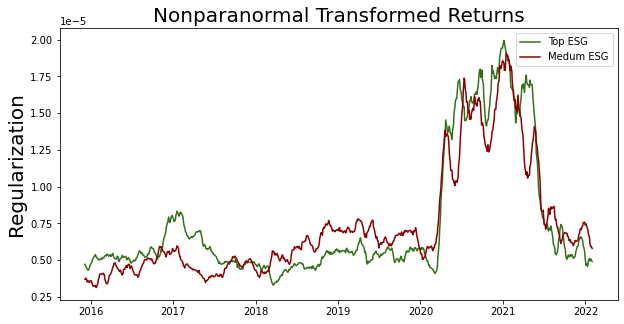

In [16]:

rw = 10
fig, ax = plt.subplots(1,1, figsize = (10,5))

pd.DataFrame(scale_F_nonparanormal['opt_lambda'], index = scale_F_nonparanormal['dates']).iloc[:,[1,2]].rolling(rw).mean().plot(ax = ax, color = color_dark[[0,2]])
ax.set_title('Nonparanormal Transformed Returns',fontdict={'fontsize':20,})
ax.set_ylabel('Regularization',fontdict={'fontsize':20,})
ax.legend(['Top ESG', 'Medum ESG', 'Low ESG'])


plot a sample graph 

0.0004143442616512217
-4.2560084021914595e-05


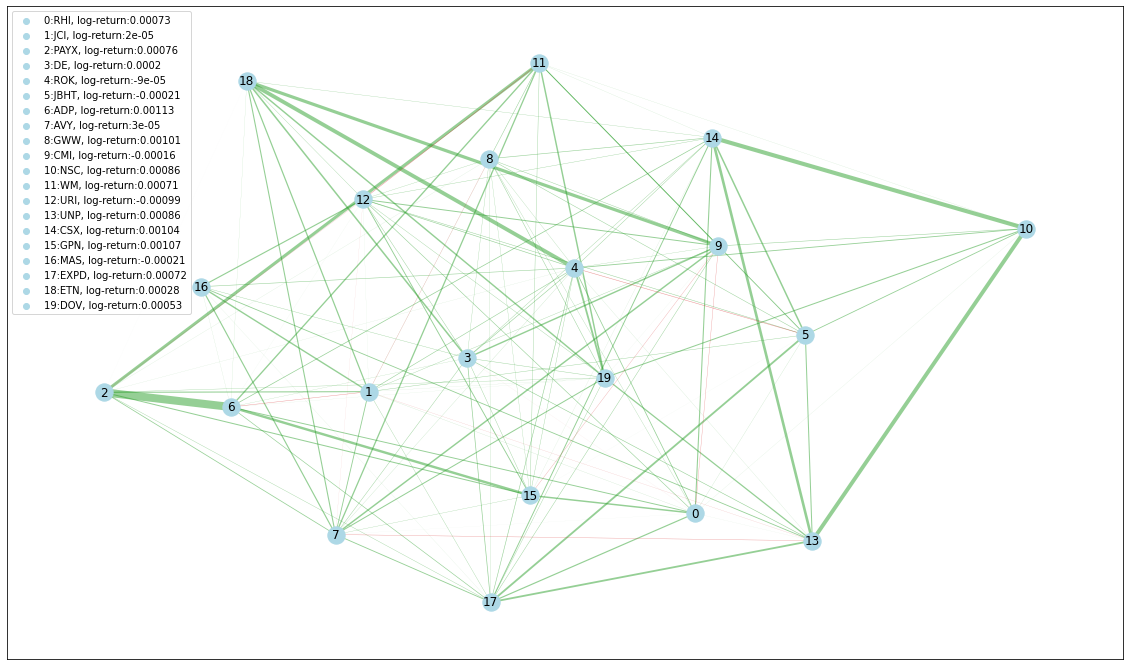

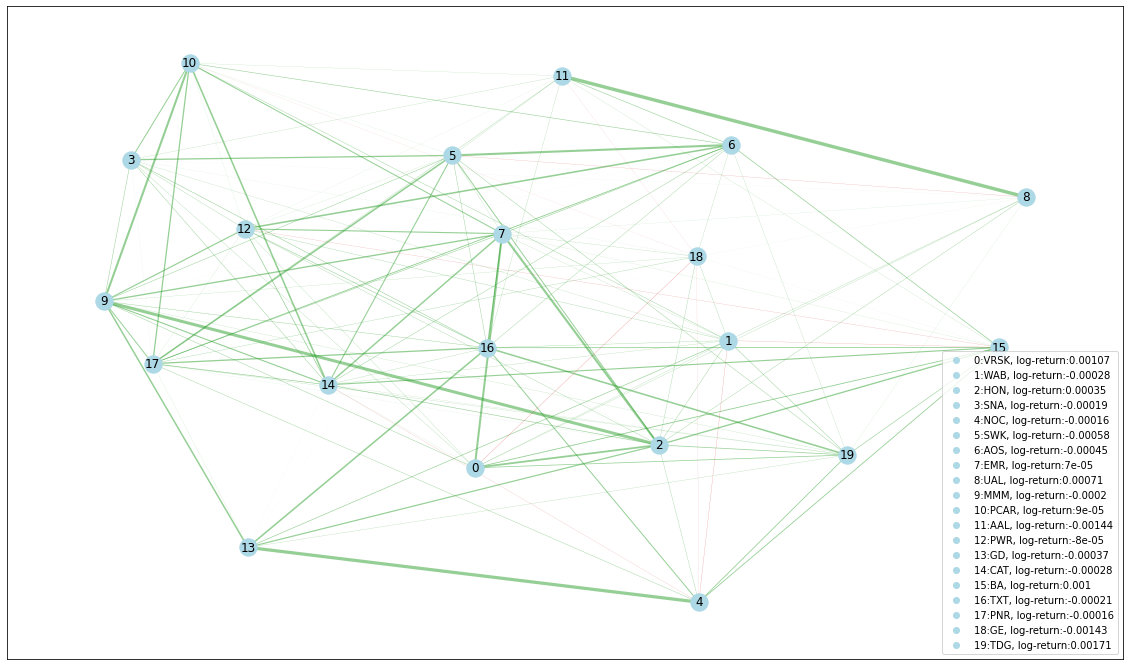

In [18]:
def plot_graph(esg_port, graph_nr):
    """
    esg_port - 0,1,2. 0 is good esg portfolio, 1 is medium esg portfolio, 2 is port esg portfolio
    graph_nr, which graph to plot index from 0 to number of graphs estimated -1
    """

    fig, ax = plt.subplots(1,1, figsize = (20,12))
    G = scale_F_nonparanormal['graph_dict'][esg_port][graph_nr]
    w = scale_F_nonparanormal['portfolios_info']['gmv']['weights'][esg_port][graph_nr]
    pos_edge = [(edge[0], edge[1]) for edge in G.edges(data = 'sign') if edge[2] == 1]
    neg_edge = [(edge[0], edge[1]) for edge in G.edges(data = 'sign') if edge[2] == -1]

    pos_width = [ w[2]/1000 for w, s in zip(G.edges(data = 'weight'), G.edges(data = 'sign') ) if s[2] == 1]
    neg_width = [ -w[2]/1000 for w, s in zip(G.edges(data = 'weight'), G.edges(data = 'sign') ) if s[2] == -1]

    pos = nx.spring_layout( G, weight=None)

    widths = nx.get_edge_attributes(G, 'weight')

    nx.draw_networkx_nodes(G, pos, node_color= 'lightblue',ax = ax)
    nx.draw_networkx_labels(G,pos,{i:i for i in range(len(scale_F_nonparanormal['stock_partition'][esg_port][graph_nr]))},ax = ax)
    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=pos_edge,
        width=pos_width,
        alpha=0.5,
        edge_color="tab:green",
        ax = ax
    )

    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=neg_edge,
        width=neg_width,
        alpha=0.5,
        edge_color="tab:red",
        ax = ax
    )
    # make empty plot with correct color and label for each group
    for cnt, v in enumerate(scale_F_nonparanormal['stock_partition'][esg_port][graph_nr]):
        plt.scatter([],[], label=f'{cnt}:{v}, log-return:{np.round(scale_F_nonparanormal["return_dict"][esg_port][graph_nr][cnt],5)}', color = 'lightblue')

    ax.legend( fontsize = 10)
    print(np.mean(scale_F_nonparanormal["return_dict"][esg_port][graph_nr]))

plot_graph(0, 420)
plot_graph(2, 420)

Plot basic graph statistics

c:\Users\User\Code\MMD_Graph_Diversification\util.py:173: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, weight = 'weight').todense()
c:\Users\User\Code\MMD_Graph_Diversification\util.py:177: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, weight = 'weight').todense()
c:\Users\User\Code\MMD_Graph_Diversification\util.py:173: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, weight = 'weight').todense()
c:\Users\User\Code\MMD_Graph_Diversification\util.py:177: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, weight = 'weight').todense()


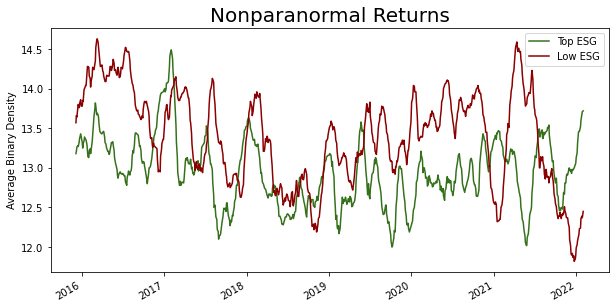

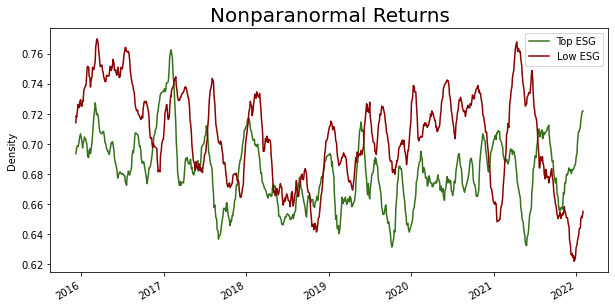

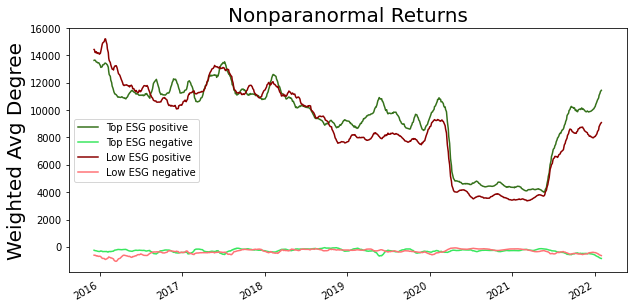

In [20]:
rw = 10
fig, ax = plt.subplots(1,1, figsize = (10,5))
plot_avg_degree(scale_F_nonparanormal, ax = ax, title = f'Nonparanormal Binary Degree', rolling_window= rw, group_iter = [0,2])
ax.set_ylabel('Average Binary Density')
ax.set_title('Nonparanormal Returns',fontdict={'fontsize':20,})
ax.tick_params( labelsize=10)
fig.autofmt_xdate()



fig, ax = plt.subplots(1,1, figsize = (10,5))
plot_G_density(scale_F_nonparanormal, ax = ax, rolling_window= rw, group_iter = [0,2], title = f'Nonparanormal Returns')
ax.set_ylabel('Density')
ax.set_title('Nonparanormal Returns',fontdict={'fontsize':20,})
ax.tick_params( labelsize=10)
fig.autofmt_xdate()



fig, ax = plt.subplots(1,1, figsize = (10,5))
plot_weight_signs(scale_F_nonparanormal, ax = ax, rolling_window= rw, group_iter = [0,2], title = f'Nonparanormal Returns')
ax.set_ylabel('Weighted Avg Degree',fontdict={'fontsize':20,})
ax.set_title('Nonparanormal Returns',fontdict={'fontsize':20,})
ax.tick_params( labelsize=10)
fig.autofmt_xdate()


Plot ESG dispersion

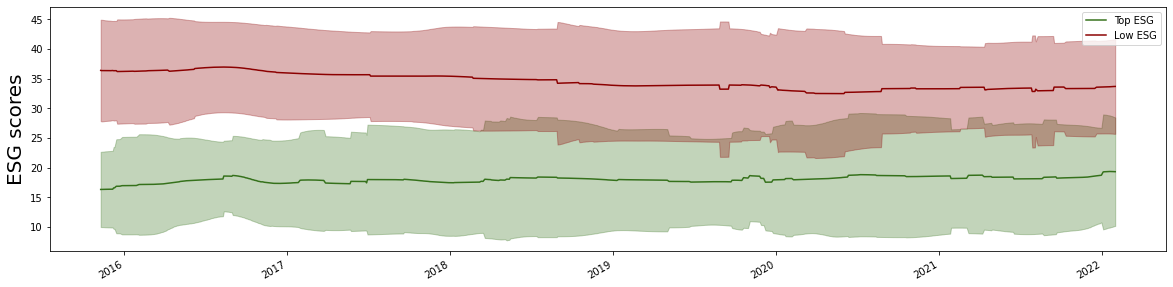

In [21]:
fig, ax = plt.subplots(1,1, figsize = (20,5))
ax.plot(scale_F_nonparanormal['dates'], scale_F_nonparanormal['esg_mean'][0], color = color_dark[0])
ax.plot(scale_F_nonparanormal['dates'], scale_F_nonparanormal['esg_mean'][2], color = color_dark[2])
ax.fill_between(
    scale_F_nonparanormal['dates'].ravel(),
    np.array(scale_F_nonparanormal['esg_mean'][0]) - 1.96 * np.array(scale_F_nonparanormal['esg_std'][0]),
    np.array(scale_F_nonparanormal['esg_mean'][0]) + 1.96 * np.array(scale_F_nonparanormal['esg_std'][0]),
    alpha=0.3,
    color = color_dark[0]
)

# ax.plot(scale_F_nonparanormal['dates'], scale_F_nonparanormal['esg_mean'][1], color = color_dark[1])
# ax.fill_between(
#     scale_F_nonparanormal['dates'].ravel(),
#     np.array(scale_F_nonparanormal['esg_mean'][1]) - 1.96 * np.array(scale_F_nonparanormal['esg_std'][1]),
#     np.array(scale_F_nonparanormal['esg_mean'][1]) + 1.96 * np.array(scale_F_nonparanormal['esg_std'][1]),
#     alpha=0.3,
#     color = color_dark[1]
# )

ax.fill_between(
    scale_F_nonparanormal['dates'].ravel(),
    np.array(scale_F_nonparanormal['esg_mean'][2]) - 1.96 * np.array(scale_F_nonparanormal['esg_std'][2]),
    np.array(scale_F_nonparanormal['esg_mean'][2]) + 1.96 * np.array(scale_F_nonparanormal['esg_std'][2]),
    alpha=0.3,
    color = color_dark[2]
)

ax.set_ylabel('ESG scores',fontdict={'fontsize':20,})


ax.tick_params( labelsize=10)
ax.legend(['Top ESG', 'Low ESG'])

fig.autofmt_xdate()

Observe if the optimal regularization gives graphs similar to the graphs obtained when using the regularization next to the optimal regularization in the regulariztion grid used.

c:\Users\User\Code\MMDGraph\.mmdvenv8\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\Code\MMDGraph\.mmdvenv8\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\User\Code\MMDGraph\.mmdvenv8\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\Code\MMDGraph\.mmdvenv8\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


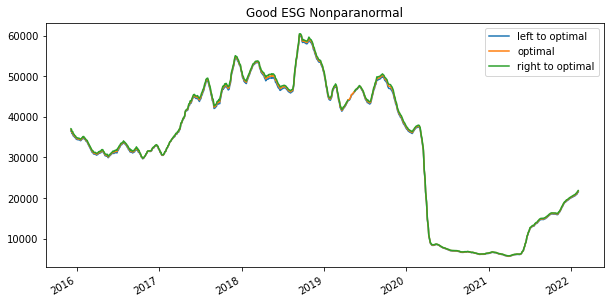

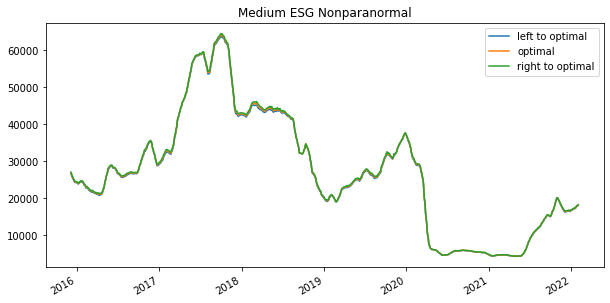

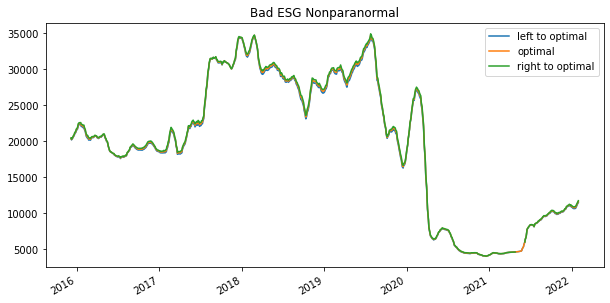

In [67]:
from cmath import isnan


def compare_best_next(df, ax, group, title = '', weight = 'weight'):
    i = group
    # minus one
    Gs_minus_one = []
    for j in range(len(df['prec_dict_minus_1'][i])):
        A = -df['prec_dict_minus_1'][i][j]
        np.fill_diagonal(A,0)
        Gs_minus_one.append(nx.from_numpy_array(A))
    
    Gs_plus_one = []
    for j in range(len(df['prec_dict_plus_1'][i])):
        A = -df['prec_dict_plus_1'][i][j]
        if np.all(np.isnan(A)):
            Gs_plus_one.append(nx.Graph())
        else:
            np.fill_diagonal(A,0)
            Gs_plus_one.append(nx.from_numpy_array(A))

    avg_degree_dict = [avg_degree(G, weight) for G in Gs_minus_one]
    ax.plot(df['dates'], pd.DataFrame(avg_degree_dict).rolling(10).mean().iloc[:,0], label = 'left to optimal')
    # best
    avg_degree_dict = [avg_degree(df['graph_dict'][i][j], weight) for j in range(len(df['prec_dict_minus_1'][i]))]
    ax.plot(df['dates'], pd.DataFrame(avg_degree_dict).rolling(10).mean().iloc[:,0], label = 'optimal')
    # plus one
    avg_degree_dict = [avg_degree(G, weight) for G in Gs_plus_one]
    ax.plot(df['dates'], pd.DataFrame(avg_degree_dict).rolling(10).mean().iloc[:,0], label = 'right to optimal')
    ax.set_title(title)
    ax.legend()

weight = 'weight'
fig, ax = plt.subplots(1,1, figsize = (10,5))
compare_best_next(scale_F_nonparanormal, ax = ax, group=0, title = f'Good ESG Nonparanormal', weight = weight)
fig.autofmt_xdate()
fig, ax = plt.subplots(1,1, figsize = (10,5))
compare_best_next(scale_F_nonparanormal, ax = ax, group=1, title = f'Medium ESG Nonparanormal', weight = weight)
fig.autofmt_xdate()
fig, ax = plt.subplots(1,1, figsize = (10,5))
compare_best_next(scale_F_nonparanormal, ax = ax, group=2, title = f'Bad ESG Nonparanormal', weight = weight)
fig.autofmt_xdate()




Plot efficient frontier (have to change group_nr to get the 0:good, 1:medium, and 2:poor esg portfolios)

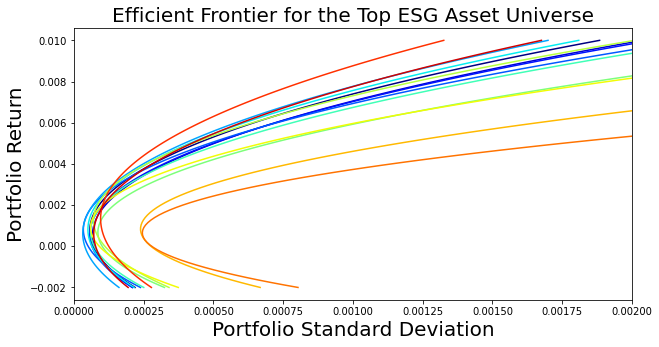

In [22]:
def eff_front(Theta, returns):

    r_hat = np.linspace(-0.002, 0.01,100)
    ones = np.ones(Theta.shape[0])

    A = np.dot(ones, Theta).dot(ones)
    B = np.dot(ones, Theta).dot(returns)
    C = np.dot(returns, Theta).dot(returns)
    denom = A*C-B**2

    sigma = (A*r_hat**2 - 2*B*r_hat + C)/denom

    return r_hat,sigma
    


start = 0.0
stop = 1.0
number_of_lines= 15
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors = [ cm.jet(x) for x in cm_subsection ]

group_nr = 0
fig, ax = plt.subplots(1,1, figsize = (10,5))
if group_nr == 0:
    ax.set_title('Efficient Frontier for the Top ESG Asset Universe',fontdict={'fontsize':20,})
elif group_nr == 2:
    ax.set_title('Efficient Frontier for the Low ESG Asset Universe',fontdict={'fontsize':20,})
else:
    assert False
for cnt, i in enumerate(range(0,len(scale_F_nonparanormal['graph_dict'][group_nr]),60)):

    r_hat, sigma = eff_front(np.linalg.inv(scale_F_nonparanormal['cov_dict'][group_nr][i]), scale_F_nonparanormal['return_dict'][group_nr][i])


    ax.plot(sigma,r_hat, label = scale_F_nonparanormal['dates'][i], color = colors[cnt])
ax.set_xlabel('Portfolio Standard Deviation',fontdict={'fontsize':20,})
ax.set_ylabel('Portfolio Return',fontdict={'fontsize':20,})
ax.tick_params( labelsize=10)
ax.set_xlim([0,0.002])

if group_nr == 0:
    pass
elif group_nr == 2:
    ax.legend(bbox_to_anchor = (1,0.9))
else:
    assert False




Plot portfolio metrics for the the good and poor esg portfolios for different portfolio constructions

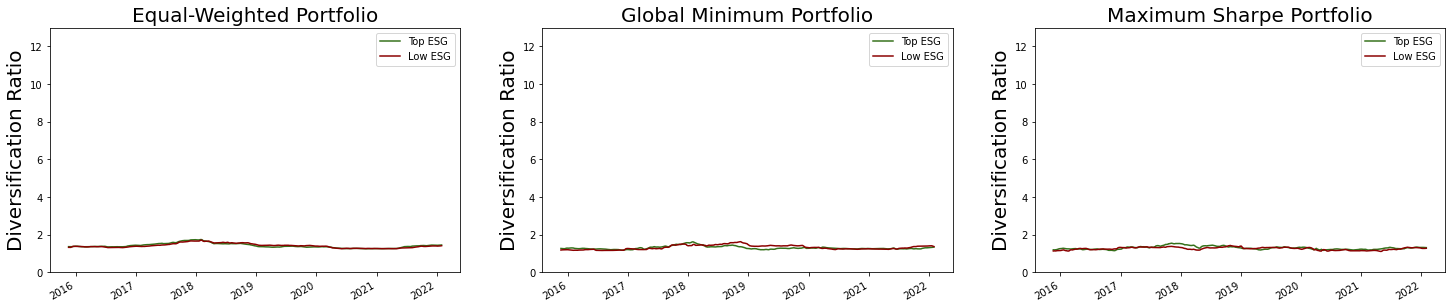

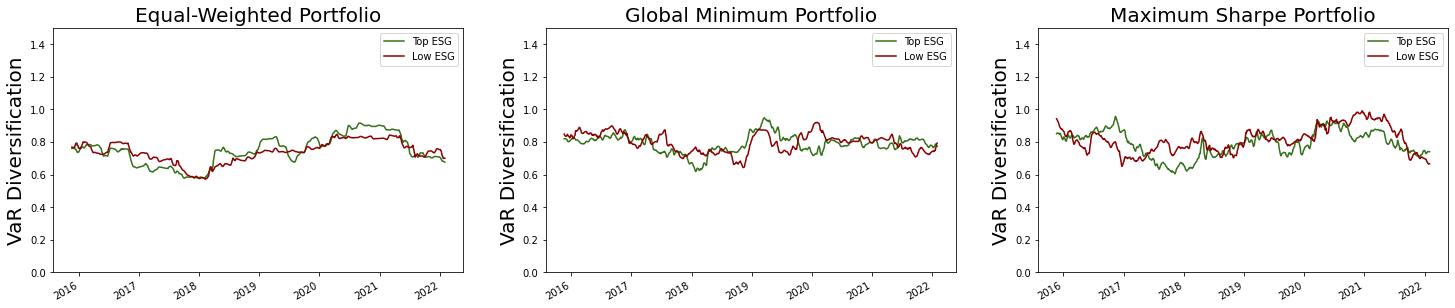

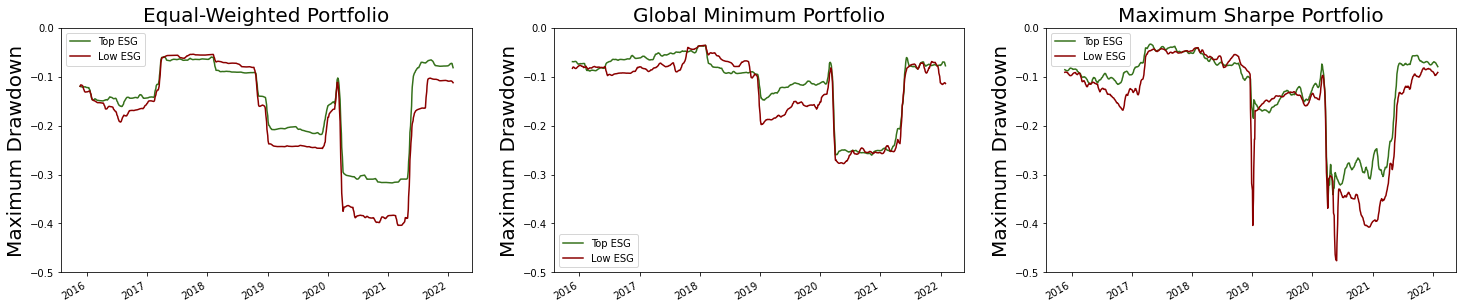

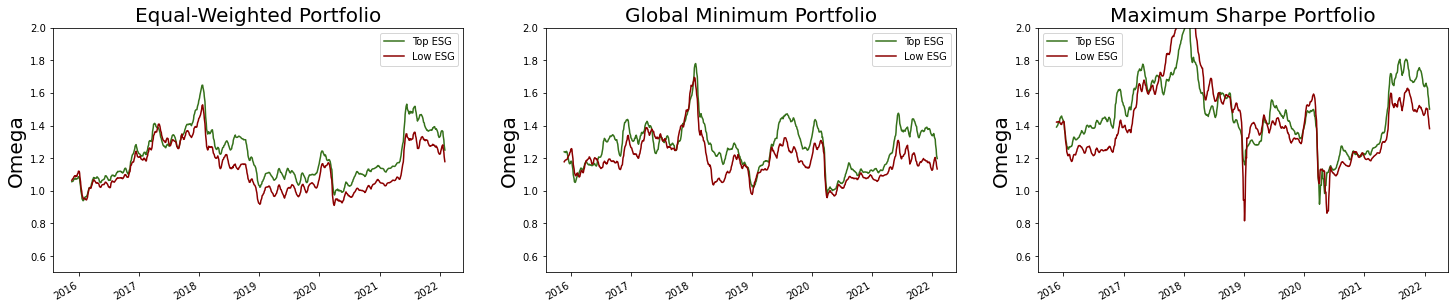

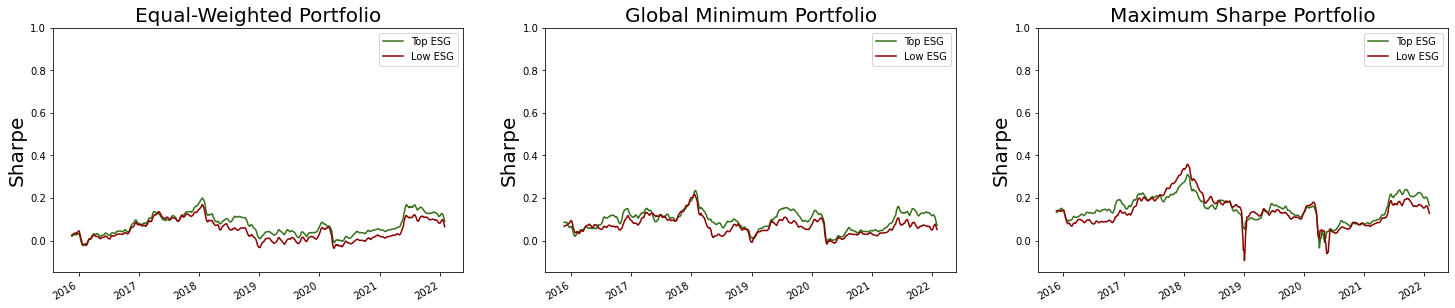

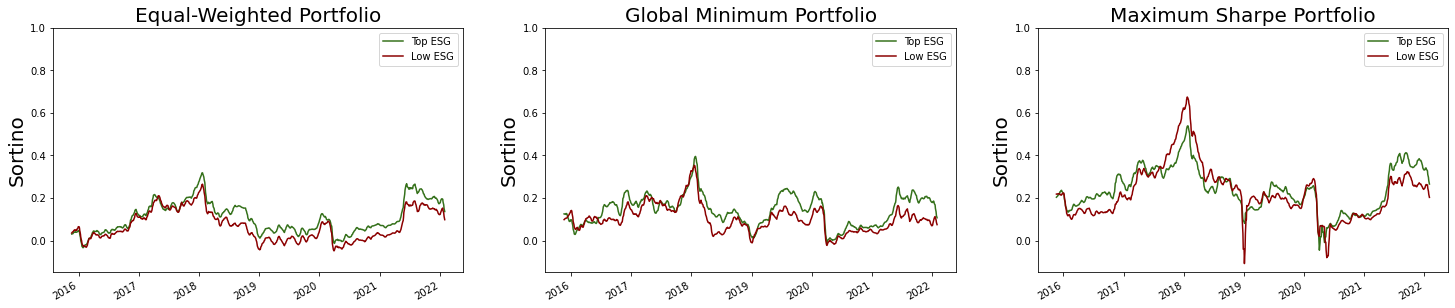

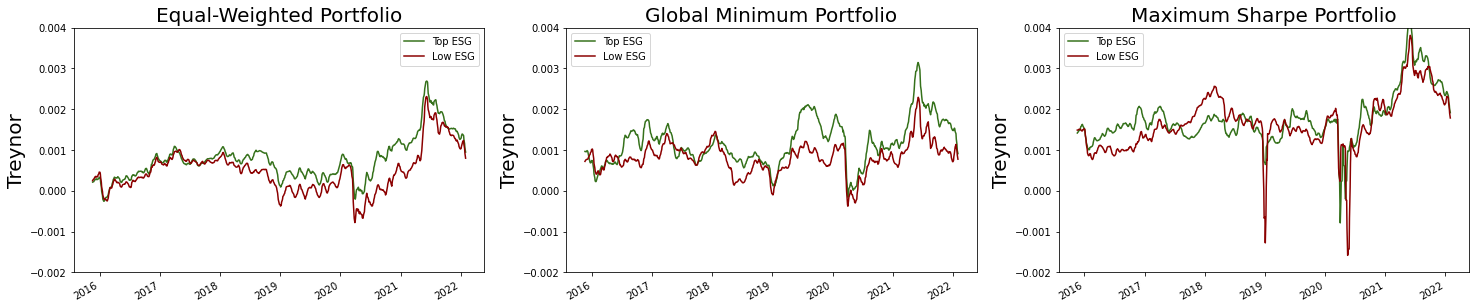

In [23]:
rmean = 5

fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['uniform']['cov_div'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'COV diversification')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['gmv']['cov_div'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'COV diversification, nonparanormal')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['sharpe']['cov_div'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'COV diversification, glasso scaled')
ax[0].set_ylabel('Diversification Ratio',fontdict={'fontsize':20,})
ax[1].set_ylabel('Diversification Ratio',fontdict={'fontsize':20,})
ax[2].set_ylabel('Diversification Ratio',fontdict={'fontsize':20,})
ax[0].set_title('Equal-Weighted Portfolio',fontdict={'fontsize':20,})
ax[1].set_title('Global Minimum Portfolio',fontdict={'fontsize':20,})
ax[2].set_title('Maximum Sharpe Portfolio',fontdict={'fontsize':20,})
ax[0].tick_params( labelsize=10)
ax[1].tick_params( labelsize=10)
ax[2].tick_params( labelsize=10)
ax[0].legend(['Top ESG', 'Low ESG'])
ax[1].legend(['Top ESG', 'Low ESG'])
ax[2].legend(['Top ESG', 'Low ESG'])
y_lim = [0.0,13]
ax[0].set_ylim(y_lim)
ax[1].set_ylim(y_lim)
ax[2].set_ylim(y_lim)
fig.autofmt_xdate()

fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['uniform']['var_div'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'COV diversification')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['gmv']['var_div'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'COV diversification, nonparanormal')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['sharpe']['var_div'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'COV diversification, glasso scaled')
ax[0].set_ylabel('VaR Diversification',fontdict={'fontsize':20,})
ax[1].set_ylabel('VaR Diversification',fontdict={'fontsize':20,})
ax[2].set_ylabel('VaR Diversification',fontdict={'fontsize':20,})
ax[0].set_title('Equal-Weighted Portfolio',fontdict={'fontsize':20,})
ax[1].set_title('Global Minimum Portfolio',fontdict={'fontsize':20,})
ax[2].set_title('Maximum Sharpe Portfolio',fontdict={'fontsize':20,})
ax[0].tick_params( labelsize=10)
ax[1].tick_params( labelsize=10)
ax[2].tick_params( labelsize=10)
ax[0].legend(['Top ESG', 'Low ESG'])
ax[1].legend(['Top ESG', 'Low ESG'])
ax[2].legend(['Top ESG', 'Low ESG'])
y_lim = [0.0,1.5]
ax[0].set_ylim(y_lim)
ax[1].set_ylim(y_lim)
ax[2].set_ylim(y_lim)
fig.autofmt_xdate()

fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['uniform']['max_draw'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'COV diversification')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['gmv']['max_draw'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'COV diversification, nonparanormal')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['sharpe']['max_draw'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'COV diversification, glasso scaled')
ax[0].set_ylabel('Maximum Drawdown',fontdict={'fontsize':20,})
ax[1].set_ylabel('Maximum Drawdown',fontdict={'fontsize':20,})
ax[2].set_ylabel('Maximum Drawdown',fontdict={'fontsize':20,})
ax[0].set_title('Equal-Weighted Portfolio',fontdict={'fontsize':20,})
ax[1].set_title('Global Minimum Portfolio',fontdict={'fontsize':20,})
ax[2].set_title('Maximum Sharpe Portfolio',fontdict={'fontsize':20,})
ax[0].tick_params( labelsize=10)
ax[1].tick_params( labelsize=10)
ax[2].tick_params( labelsize=10)
ax[0].legend(['Top ESG', 'Low ESG'])
ax[1].legend(['Top ESG', 'Low ESG'])
ax[2].legend(['Top ESG', 'Low ESG'])
y_lim = [-0.5,0]
ax[0].set_ylim(y_lim)
ax[1].set_ylim(y_lim)
ax[2].set_ylim(y_lim)
fig.autofmt_xdate()


fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['uniform']['omega'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'COV diversification')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['gmv']['omega'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'COV diversification, nonparanormal')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['sharpe']['omega'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'COV diversification, glasso scaled')
ax[0].set_ylabel('Omega',fontdict={'fontsize':20,})
ax[1].set_ylabel('Omega',fontdict={'fontsize':20,})
ax[2].set_ylabel('Omega',fontdict={'fontsize':20,})
ax[0].set_title('Equal-Weighted Portfolio',fontdict={'fontsize':20,})
ax[1].set_title('Global Minimum Portfolio',fontdict={'fontsize':20,})
ax[2].set_title('Maximum Sharpe Portfolio',fontdict={'fontsize':20,})
ax[0].tick_params( labelsize=10)
ax[1].tick_params( labelsize=10)
ax[2].tick_params( labelsize=10)
ax[0].legend(['Top ESG', 'Low ESG'])
ax[1].legend(['Top ESG', 'Low ESG'])
ax[2].legend(['Top ESG', 'Low ESG'])
y_lim = [.5,2]
ax[0].set_ylim(y_lim)
ax[1].set_ylim(y_lim)
ax[2].set_ylim(y_lim)
fig.autofmt_xdate()

fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['uniform']['sharpe'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'COV diversification')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['gmv']['sharpe'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'COV diversification, nonparanormal')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['sharpe']['sharpe'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'COV diversification, glasso scaled')
ax[0].set_ylabel('Sharpe',fontdict={'fontsize':20,})
ax[1].set_ylabel('Sharpe',fontdict={'fontsize':20,})
ax[2].set_ylabel('Sharpe',fontdict={'fontsize':20,})
ax[0].set_title('Equal-Weighted Portfolio',fontdict={'fontsize':20,})
ax[1].set_title('Global Minimum Portfolio',fontdict={'fontsize':20,})
ax[2].set_title('Maximum Sharpe Portfolio',fontdict={'fontsize':20,})
ax[0].tick_params( labelsize=10)
ax[1].tick_params( labelsize=10)
ax[2].tick_params( labelsize=10)
ax[0].legend(['Top ESG', 'Low ESG'])
ax[1].legend(['Top ESG', 'Low ESG'])
ax[2].legend(['Top ESG', 'Low ESG'])
y_lim = [-0.15,1]
ax[0].set_ylim(y_lim)
ax[1].set_ylim(y_lim)
ax[2].set_ylim(y_lim)
fig.autofmt_xdate()


fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['uniform']['sortino'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'COV diversification')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['gmv']['sortino'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'COV diversification, nonparanormal')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['sharpe']['sortino'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'COV diversification, glasso scaled')
ax[0].set_ylabel('Sortino',fontdict={'fontsize':20,})
ax[1].set_ylabel('Sortino',fontdict={'fontsize':20,})
ax[2].set_ylabel('Sortino',fontdict={'fontsize':20,})
ax[0].set_title('Equal-Weighted Portfolio',fontdict={'fontsize':20,})
ax[1].set_title('Global Minimum Portfolio',fontdict={'fontsize':20,})
ax[2].set_title('Maximum Sharpe Portfolio',fontdict={'fontsize':20,})
ax[0].tick_params( labelsize=10)
ax[1].tick_params( labelsize=10)
ax[2].tick_params( labelsize=10)
ax[0].legend(['Top ESG', 'Low ESG'])
ax[1].legend(['Top ESG', 'Low ESG'])
ax[2].legend(['Top ESG', 'Low ESG'])
y_lim = [-0.15,1]
ax[0].set_ylim(y_lim)
ax[1].set_ylim(y_lim)
ax[2].set_ylim(y_lim)
fig.autofmt_xdate()

fig, ax = plt.subplots(1,3, figsize = (25,5))
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['uniform']['treynor'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[0], color = color_dark[[0,2]], title = f'COV diversification')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['gmv']['treynor'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[1], color = color_dark[[0,2]], title = f'COV diversification, nonparanormal')
pd.DataFrame(scale_F_nonparanormal['portfolios_info']['sharpe']['treynor'], index = scale_F_nonparanormal['dates']).iloc[:, [0,2]].rolling(rmean).mean().plot(ax = ax[2], color = color_dark[[0,2]], title = f'COV diversification, glasso scaled')
ax[0].set_ylabel('Treynor',fontdict={'fontsize':20,})
ax[1].set_ylabel('Treynor',fontdict={'fontsize':20,})
ax[2].set_ylabel('Treynor',fontdict={'fontsize':20,})
ax[0].set_title('Equal-Weighted Portfolio',fontdict={'fontsize':20,})
ax[1].set_title('Global Minimum Portfolio',fontdict={'fontsize':20,})
ax[2].set_title('Maximum Sharpe Portfolio',fontdict={'fontsize':20,})
ax[0].tick_params( labelsize=10)
ax[1].tick_params( labelsize=10)
ax[2].tick_params( labelsize=10)
ax[0].legend(['Top ESG', 'Low ESG'])
ax[1].legend(['Top ESG', 'Low ESG'])
ax[2].legend(['Top ESG', 'Low ESG'])
ax[2].legend(['Top ESG', 'Low ESG'])
y_lim = [-0.002,0.004]
ax[0].set_ylim(y_lim)
ax[1].set_ylim(y_lim)
ax[2].set_ylim(y_lim)
fig.autofmt_xdate()


Plot per regularization

In [24]:
def plot_regularization(data_dict, portfolio_type, group, port_metric, ax, title):
    sector = data_dict['sector']
    for regularization in data_dict['portfolios_reg_info'][portfolio_type].keys():
        ddd = data_dict['portfolios_reg_info'][portfolio_type][regularization]
        df = pd.DataFrame(ddd[port_metric][group], index = data_dict['dates']).rolling(5).mean()
        ax.plot(df.index, df.iloc[:,0], label = regularization )
        
    ddd_opt = data_dict['portfolios_info'][portfolio_type]
    df_opt = pd.DataFrame(ddd_opt[port_metric][group], index = data_dict['dates']).rolling(5).mean()
    ax.plot(df.index, df_opt.iloc[:,0], label = 'Optimal', color = 'black', alpha = 0.8)
    ax.set_title(f'{title} {port_metric}')

    ax.legend()

Look at if the assets jump often between esg classes. Should preferably be constant.

Text(0.5, 1.0, 'Portfolio Membership of Assets')

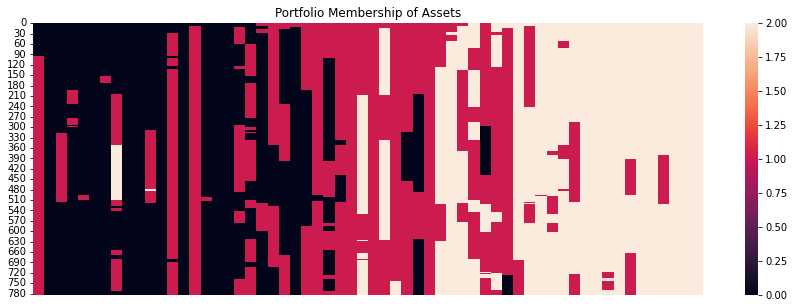

In [25]:
unique_stocks =np.concatenate((scale_F_nonparanormal['stock_partition'][0][0],scale_F_nonparanormal['stock_partition'][1][0],scale_F_nonparanormal['stock_partition'][2][0]))
n = len(scale_F_nonparanormal['stock_partition'][0])
p = len(unique_stocks)
unique_stocks = pd.DataFrame(np.zeros((n,p)), columns= unique_stocks)

for col in unique_stocks.columns:
    for i in range(len(scale_F_nonparanormal['stock_partition'][0])):
        for j in range(3):
            if col in scale_F_nonparanormal['stock_partition'][j][i]:
                unique_stocks[col].iloc[i] = j
                continue

fig, ax = plt.subplots(1,1, figsize = (15,5))
sns.heatmap(unique_stocks, ax = ax, xticklabels=False)

ax.set_title("Portfolio Membership of Assets")

Count number proportion of sector in each class (Will only be informative for the global portfolios)

In [26]:
n = len(scale_F_nonparanormal['stock_partition'][0])
p = 11
sector_count = pd.DataFrame(np.zeros((n*3,12)), columns= np.concatenate((list(sector_classification.keys()), ["group"])))

for k in sector_classification.keys():
    for i in range(len(scale_F_nonparanormal['stock_partition'][0])):
        for j in range(3):
            cnt = np.sum(np.isin(scale_F_nonparanormal['stock_partition'][j][i], sector_classification[k]))
            sector_count[k].iloc[(i*3)+j] = cnt
            sector_count['group'].iloc[(i*3)+j] = j


Text(0.5, 1.0, 'Low ESG Asset World')

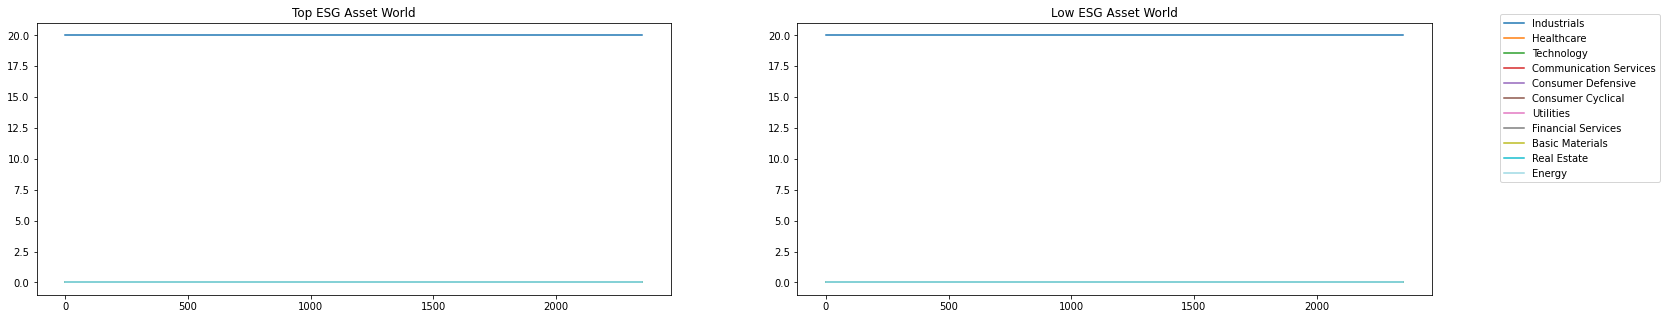

In [27]:

start = 0.0
stop = 1.0
number_of_lines= 11
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors = [ cm.tab20(x) for x in cm_subsection ]

fig, ax = plt.subplots(1,2, figsize = (25,5))
for cnt,j in enumerate([0,2]):
    # [['Utilities', 'Energy', 'Basic Materials']]
    sector_count.loc[sector_count['group'] == j, ~np.isin(sector_count.columns, ["group"])].plot(ax = ax[cnt], title = f'Group {j}', color = colors,legend=False)

ax[1].legend(bbox_to_anchor=(1.1, 1.05))
ax[0].set_title("Top ESG Asset World")
ax[1].set_title("Low ESG Asset World")



# Look at mmd

Look if there is a relationship between size of portfolio and esg score, I manually created this data by loading it individally. 

In [32]:
with open("../data/esg_portfolio_diff.pkl", "rb") as f:
    esg_portfolio_diff = pickle.load(f)
with open("../data/monk_data.pkl", "rb") as f:
    monk_data = pickle.load(f)
monk_data = monk_data.rename(columns = {'all':'Global'})


In [33]:
window = 70

agg_monk_rej = pd.DataFrame()
agg_esg_diff = pd.DataFrame()
for i in range(window,monk_data.shape[0], window ):
    tmp_rej = dict()
    tmp_diff = dict()
    for j in esg_portfolio_diff.columns:
        if j == 'dates':
            continue
        tmp_rej[j] = np.mean(monk_data[j ].iloc[(i-window):i] <= 0.01)
        tmp_diff[j] = np.mean(esg_portfolio_diff[j ].iloc[(i-window):i])
    
    tmp_rej['dates'] = monk_data['dates'].iloc[i]
    tmp_diff['dates'] = monk_data['dates'].iloc[i]


    agg_monk_rej = pd.concat((agg_monk_rej, pd.DataFrame(tmp_rej, index = [0])), ignore_index=True)
    agg_esg_diff = pd.concat((agg_esg_diff, pd.DataFrame(tmp_diff, index = [0])), ignore_index=True)




Text(0.5, 0, 'Difference between ESG scores')

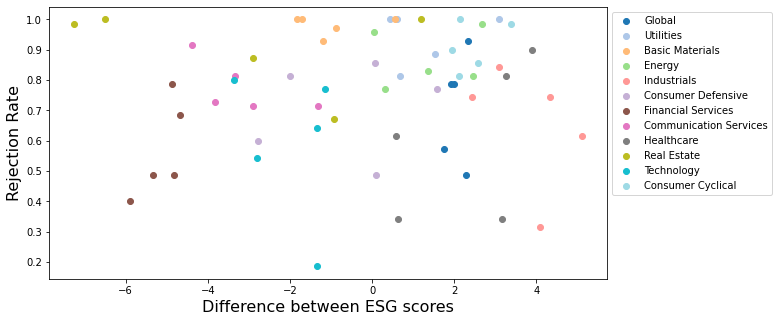

In [34]:
from matplotlib import cm
start = 0.0
stop = 1.0
number_of_lines= 12
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors = [ cm.tab20(x) for x in cm_subsection ]

fig, ax = plt.subplots(1,1, figsize = (10,5))
for i, j in enumerate(agg_monk_rej.columns):
    if j == 'dates':
        continue
    ax.scatter(agg_esg_diff[j], agg_monk_rej[j], label = j, color = colors[i])
ax.legend()
ax.legend(bbox_to_anchor = (1,1))
ax.set_ylabel("Rejection Rate", fontdict={'fontsize':16})
ax.set_xlabel("Difference between ESG scores", fontdict={'fontsize':16})

Text(0.5, 0, 'Date')

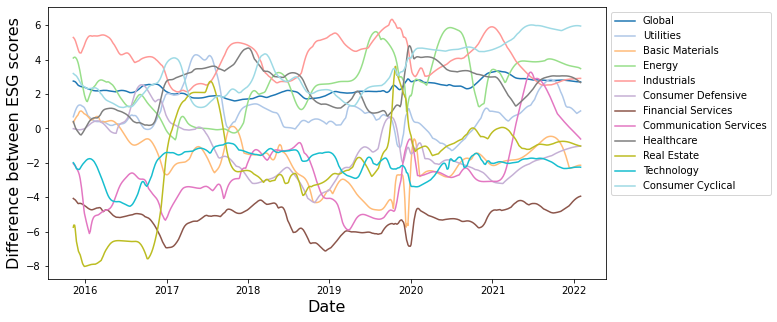

In [35]:

from matplotlib import cm
start = 0.0
stop = 1.0
number_of_lines= 12
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors = [ cm.tab20(x) for x in cm_subsection ]

fig,ax = plt.subplots(1,1, figsize = (10,5))
for i, k in enumerate(esg_portfolio_diff.columns):
    ax.plot(esg_portfolio_diff.index, esg_portfolio_diff[k], color = colors[i], label = k)
ax.legend(bbox_to_anchor = (1,1))
ax.set_ylabel("Difference between ESG scores", fontdict={'fontsize':16})
ax.set_xlabel("Date", fontdict={'fontsize':16})

Now load mmd. Note that we load the portfolios again as well

In [36]:

study = 'Industrials'
with open(f'../data/Graphs/{study}_d_1_winlen_300_gest_huge_glasso_ebic_scale_False_trans_nonparanormal.pkl', 'rb') as f:
    scale_F_nonparanormal = pickle.load(f)

# n_20_B_5000_dstep_2_glabel_rw_p_return_tensor_False_c_1e-07
# n_20_B_5000_dstep_2_glabel_wloa_p_return_tensor_False_h_2
# n_20_B_5000_dstep_2_glabel_wl_p_return_tensor_False_h_2
# n_20_B_5000_dstep_2_glabel_prop_p_return_tensor_False_w_0.0001_t_max_6
# n_20_B_5000_dstep_2_glabel_rw_p_return_tensor_False_c_1e-07
# n_20_B_5000_dstep_2_glabel_sp_p_uniform_tensor_False_round_node_1_round_edge_2
# n_20_B_5000_dstep_2_glabel_pyramid_p_return_tensor_False_L_8_d_6_with_labels_False
with open(f'../data/mmd_test/{study}/n_20_B_5000_dstep_2_glabel_wl_p_return_tensor_False_h_2.pkl', 'rb') as f:
    test_info = pickle.load(f)
test_info.keys()


print(np.sum(test_info['info_dict']['MONK_EST'] <0.01)/test_info['info_dict'].shape[0])
print(np.sum(test_info['info_dict']['MMD_u'] <0.01)/test_info['info_dict'].shape[0])
print(np.sum(test_info['info_dict']['MMD_l'] <0.01)/test_info['info_dict'].shape[0])


0.5706806282722513
0.8036649214659686
0.8821989528795812


 Plot mmd for different estimators

Text(0, 0.5, 'p-value')

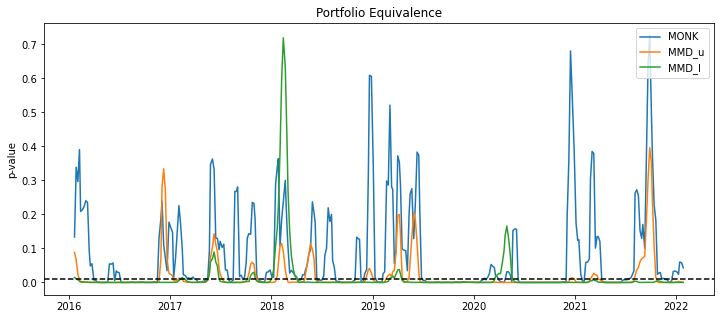

In [38]:
tmp = test_info['info_dict']
sector = test_info['sector']
fig ,ax = plt.subplots(1,1, figsize = (12,5))

tmp['id'] = tmp['group_i'].astype(str) + tmp['group_j'].astype(str) 
for id in ["02"]:#np.unique(tmp['id']):
    tmp_tmp = tmp.loc[tmp['id'] == id]

    ax.plot(tmp_tmp['dates'], tmp_tmp['MONK_EST'].rolling(3).mean(), label = 'MONK')
    ax.plot(tmp_tmp['dates'], tmp_tmp['MMD_u'].rolling(3).mean(), label = 'MMD_u')
    ax.plot(tmp_tmp['dates'], tmp_tmp['MMD_l'].rolling(3).mean(), label = 'MMD_l')
ax.axhline(y = 0.01, color = 'black', linestyle = '--')
ax.legend(loc = 'upper right')
ax.set_title('Portfolio Equivalence')
ax.set_ylabel('p-value')


Create counts of how often a metric belonging to the good esg portfolio outperforms the corresponding metric from the poor esg portfolio. Also create features to be used for PCA, lasso and SVM

In [40]:
ptypes = list(scale_F_nonparanormal['portfolios_info'].keys())
metrics = list(scale_F_nonparanormal['portfolios_info']['gmv'].keys())
higher_better = ['omega', 'sharpe', 'sortino', 'treynor', 'max_draw', 'cov_div']

info_dataframe = pd.DataFrame()
cluster_dataframe = pd.DataFrame()


for i in range(test_info['info_dict'].shape[0]):
    date_i = test_info['info_dict']['dates'].iloc[i]
    idx = np.where(scale_F_nonparanormal['dates'] == date_i)[0][0]  # index for each metric
    n = 20
    info = dict()
    cluster_info = dict()
    for ptype in ptypes:
        for metric in metrics:
            if metric == 'weights' or metric == 'beta':
                continue

            current_metric_analyzed_good = np.array(scale_F_nonparanormal['portfolios_info'][ptype][metric][0])
            current_metric_analyzed_poor = np.array(scale_F_nonparanormal['portfolios_info'][ptype][metric][2])

            info['ptype'] = ptype
            info['metric'] = metric
            if metric == 'var_div':
                info['ratio_good_esg_better'] = np.sum(current_metric_analyzed_good[(idx-n):idx] < current_metric_analyzed_poor[(idx-n):idx])/float(n)
                info['nr_good_esg_better'] = np.sum(current_metric_analyzed_good[(idx-n):idx] < current_metric_analyzed_poor[(idx-n):idx])
            else:
                info['ratio_good_esg_better'] = np.sum(current_metric_analyzed_good[(idx-n):idx] > current_metric_analyzed_poor[(idx-n):idx])/float(n)
                info['nr_good_esg_better'] = np.sum(current_metric_analyzed_good[(idx-n):idx] > current_metric_analyzed_poor[(idx-n):idx])

            info['MONK'] = test_info['info_dict']['MONK_EST'].iloc[i] <0.01
            info['MMD_u'] = test_info['info_dict']['MMD_u'].iloc[i] <0.01
            info['MMD_l'] = test_info['info_dict']['MMD_l'].iloc[i] <0.01
            info['date'] = date_i

            info = pd.DataFrame(info, index = [0])
            info_dataframe = pd.concat((info_dataframe, info), ignore_index= True)

            cluster_info[str(ptype) + str(metric)] = np.mean(current_metric_analyzed_good[(idx-n):idx]-current_metric_analyzed_poor[(idx-n):idx])

    cluster_info['label_monk'] = int(test_info['info_dict']['MONK_EST'].iloc[i] <0.01)
    cluster_info['label_mmd_u'] = int(test_info['info_dict']['MMD_u'].iloc[i] <0.01)
    cluster_info['label_mmd_l'] = int(test_info['info_dict']['MMD_l'].iloc[i] <0.01)
    cluster_info['date'] = date_i
    cluster_info = pd.DataFrame(cluster_info, index = [0])
    cluster_dataframe = pd.concat((cluster_dataframe, cluster_info), ignore_index= True)




In [41]:
info_dataframe['DivMetric'] = False
info_dataframe['DivMetric'].loc[np.isin(info_dataframe['metric'], ['cov_div', 'var_div']) ] = True
info_dataframe['nr_bad_esg_better'] = 20-info_dataframe['nr_good_esg_better']

C:\Users\User\AppData\Local\Temp\ipykernel_7252\111386262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_dataframe['DivMetric'].loc[np.isin(info_dataframe['metric'], ['cov_div', 'var_div']) ] = True


In [42]:
info_dataframe

,ptype,metric,ratio_good_esg_better,nr_good_esg_better,MONK,MMD_u,MMD_l,date,DivMetric,nr_bad_esg_better
0,uniform,cov_div,0.8,16,False,False,False,2016-01-08,True,4
1,uniform,var_div,1.0,20,False,False,False,2016-01-08,True,0
2,uniform,omega,0.1,2,False,False,False,2016-01-08,False,18
3,uniform,sharpe,0.1,2,False,False,False,2016-01-08,False,18
4,uniform,sortino,0.1,2,False,False,False,2016-01-08,False,18
...,...,...,...,...,...,...,...,...,...,...
8017,gmv,omega,1.0,20,False,True,True,2022-01-27,False,0
8018,gmv,sharpe,1.0,20,False,True,True,2022-01-27,False,0
8019,gmv,sortino,1.0,20,False,True,True,2022-01-27,False,0
8020,gmv,treynor,1.0,20,False,True,True,2022-01-27,False,0


In [43]:
nr_date = len(np.unique(info_dataframe['date']))
nr_metric = len(np.unique(info_dataframe['metric']))
nr_ptype = len(np.unique(info_dataframe['ptype']))

nr_esg_better = info_dataframe[[ 'nr_good_esg_better']].agg(['sum'])
nr_esg_better['ratio_nr_good_esg_better'] = nr_esg_better['nr_good_esg_better']/(20*nr_date*nr_metric*nr_ptype)
nr_esg_better.reset_index(inplace=True)
nr_esg_better

,index,nr_good_esg_better,ratio_nr_good_esg_better
0,sum,116411,0.725573


In [44]:
nr_date = len(np.unique(info_dataframe['date']))
nr_metric = len(np.unique(info_dataframe['metric']))
nr_ptype = len(np.unique(info_dataframe['ptype']))

nr_rejected = info_dataframe[[ 'MONK','nr_good_esg_better', 'nr_bad_esg_better']].groupby(['MONK']).agg(['sum', 'count'])
nr_rejected.reset_index(inplace=True)
nr_rejected['ratio_nr_good_esg_better'] = nr_rejected[('nr_good_esg_better', 'sum')]/nr_rejected[('nr_good_esg_better', 'count')]/20
nr_rejected['ratio_nr_bad_esg_better'] = nr_rejected[('nr_bad_esg_better', 'sum')]/nr_rejected[('nr_good_esg_better', 'count')]/20
#nr_rejected.reset_index(inplace=True)
nr_rejected

MONK nr_good_esg_better       nr_bad_esg_better        \
                        sum count               sum count   
0  False              46587  3444             22293  3444   
1   True              69824  4578             21736  4578   

  ratio_nr_good_esg_better ratio_nr_bad_esg_better  
                                                    
0                 0.676350                0.323650  
1                 0.762604                0.237396

In [45]:
nr_date = len(np.unique(info_dataframe['date']))
nr_metric = len(np.unique(info_dataframe['metric']))
nr_ptype = len(np.unique(info_dataframe['ptype']))

nr_rejected_per_ptype = info_dataframe[['ptype','MONK','nr_good_esg_better']].groupby(['ptype','MONK']).agg(['sum', 'count'])
nr_rejected_per_ptype.reset_index(inplace=True)
nr_rejected_per_ptype['ratio_nr_good_esg_better'] = nr_rejected_per_ptype[('nr_good_esg_better', 'sum')]/nr_rejected_per_ptype[('nr_good_esg_better', 'count')]/20
#nr_rejected.reset_index(inplace=True)
nr_rejected_per_ptype

ptype   MONK nr_good_esg_better       ratio_nr_good_esg_better
                                 sum count                         
0      gmv  False              16069  1148                 0.699869
1      gmv   True              23473  1526                 0.769102
2   sharpe  False              13253  1148                 0.577221
3   sharpe   True              22022  1526                 0.721560
4  uniform  False              17265  1148                 0.751960
5  uniform   True              24329  1526                 0.797149

In [46]:
nr_date = len(np.unique(info_dataframe['date']))
nr_metric = len(np.unique(info_dataframe['metric']))
nr_ptype = len(np.unique(info_dataframe['ptype']))

nr_rejected_per_ptype_divmetric = info_dataframe[['DivMetric','ptype','MONK','nr_good_esg_better']].groupby(['DivMetric','ptype','MONK']).agg(['sum', 'count'])
nr_rejected_per_ptype_divmetric.reset_index(inplace=True)
nr_rejected_per_ptype_divmetric['ratio_nr_good_esg_better'] = nr_rejected_per_ptype_divmetric[('nr_good_esg_better', 'sum')]/nr_rejected_per_ptype_divmetric[('nr_good_esg_better', 'count')]/20
#nr_rejected.reset_index(inplace=True)
nr_rejected_per_ptype_divmetric.sort_values(['ptype'])

DivMetric    ptype   MONK nr_good_esg_better       ratio_nr_good_esg_better
                                            sum count                         
0      False      gmv  False              12918   820                 0.787683
1      False      gmv   True              18485  1090                 0.847936
6       True      gmv  False               3151   328                 0.480335
7       True      gmv   True               4988   436                 0.572018
2      False   sharpe  False               8891   820                 0.542134
3      False   sharpe   True              16353  1090                 0.750138
8       True   sharpe  False               4362   328                 0.664939
9       True   sharpe   True               5669   436                 0.650115
4      False  uniform  False              13736   820                 0.837561
5      False  uniform   True              20422  1090                 0.936789
10      True  uniform  False               3529   328                 0.537957
11      True  uniform   True               3907   436                 0.448050

In [47]:
nr_date = len(np.unique(info_dataframe['date']))
nr_metric = len(np.unique(info_dataframe['metric']))
nr_ptype = len(np.unique(info_dataframe['ptype']))

nr_rejected_per_ptype_metric = info_dataframe[['metric','ptype','MONK','nr_good_esg_better']].groupby(['metric','ptype','MONK']).agg(['sum', 'count'])
nr_rejected_per_ptype_metric.reset_index(inplace=True)
nr_rejected_per_ptype_metric['ratio_nr_good_esg_better'] = nr_rejected_per_ptype_metric[('nr_good_esg_better', 'sum')]/nr_rejected_per_ptype_metric[('nr_good_esg_better', 'count')]/20
#nr_rejected.reset_index(inplace=True)
nr_rejected_per_ptype_metric
nr_rejected_per_ptype_metric.sort_values(['metric','ptype'])

metric    ptype   MONK nr_good_esg_better       ratio_nr_good_esg_better
                                            sum count                         
0    cov_div      gmv  False               1542   164                 0.470122
1    cov_div      gmv   True               2488   218                 0.570642
2    cov_div   sharpe  False               2188   164                 0.667073
3    cov_div   sharpe   True               3102   218                 0.711468
4    cov_div  uniform  False               1951   164                 0.594817
5    cov_div  uniform   True               2145   218                 0.491972
6   max_draw      gmv  False               2240   164                 0.682927
7   max_draw      gmv   True               2953   218                 0.677294
8   max_draw   sharpe  False               2206   164                 0.672561
9   max_draw   sharpe   True               3284   218                 0.753211
10  max_draw  uniform  False               2196   164                 0.669512
11  max_draw  uniform   True               3510   218                 0.805046
12     omega      gmv  False               2644   164                 0.806098
13     omega      gmv   True               3866   218                 0.886697
14     omega   sharpe  False               1697   164                 0.517378
15     omega   sharpe   True               3303   218                 0.757569
16     omega  uniform  False               2909   164                 0.886890
17     omega  uniform   True               4238   218                 0.972018
18    sharpe      gmv  False               2717   164                 0.828354
19    sharpe      gmv   True               3913   218                 0.897477
20    sharpe   sharpe  False               1698   164                 0.517683
21    sharpe   sharpe   True               3305   218                 0.758028
22    sharpe  uniform  False               2891   164                 0.881402
23    sharpe  uniform   True               4236   218                 0.971560
24   sortino      gmv  False               2686   164                 0.818902
25   sortino      gmv   True               3884   218                 0.890826
26   sortino   sharpe  False               1714   164                 0.522561
27   sortino   sharpe   True               3293   218                 0.755275
28   sortino  uniform  False               2935   164                 0.894817
29   sortino  uniform   True               4242   218                 0.972936
30   treynor      gmv  False               2631   164                 0.802134
31   treynor      gmv   True               3869   218                 0.887385
32   treynor   sharpe  False               1576   164                 0.480488
33   treynor   sharpe   True               3168   218                 0.726606
34   treynor  uniform  False               2805   164                 0.855183
35   treynor  uniform   True               4196   218                 0.962385
36   var_div      gmv  False               1609   164                 0.490549
37   var_div      gmv   True               2500   218                 0.573394
38   var_div   sharpe  False               2174   164                 0.662805
39   var_div   sharpe   True               2567   218                 0.588761
40   var_div  uniform  False               1578   164                 0.481098
41   var_div  uniform   True               1762   218                 0.404128

PCA analysis

In [48]:

uniform_cols = ['uniformcov_div', 'uniformvar_div', 'uniformomega', 'uniformsharpe',
       'uniformsortino', 'uniformtreynor', 'uniformmax_draw']
sharpe_cols = ['sharpecov_div', 'sharpevar_div', 'sharpeomega', 'sharpesharpe',
       'sharpesortino', 'sharpetreynor', 'sharpemax_draw']
gmv_cols = ['gmvcov_div', 'gmvvar_div', 'gmvomega', 'gmvsharpe', 'gmvsortino', 'gmvtreynor', 'gmvmax_draw']

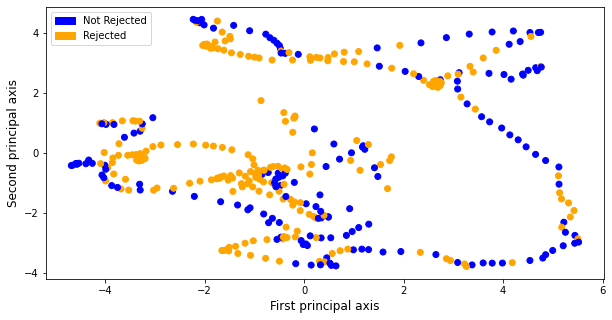

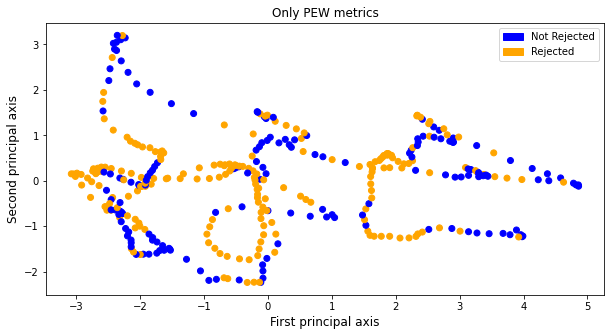

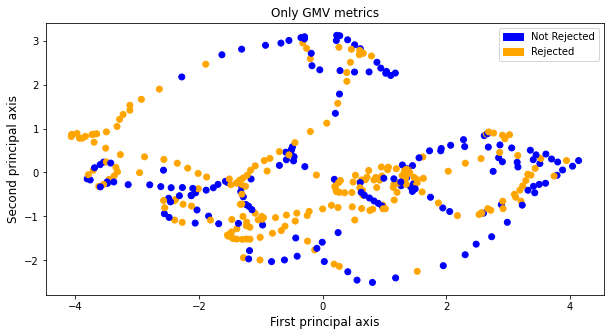

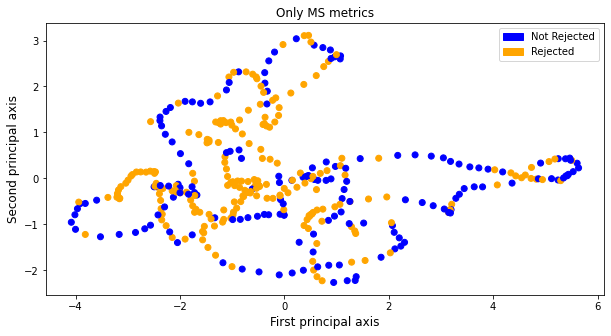

In [75]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
colors_monk = np.array(['lightgreen'] * cluster_dataframe.shape[0])
colors_monk[cluster_dataframe['label_monk'] == 0] = 'lightred'

y = np.zeros(len(cluster_dataframe['label_monk'] ))
y[cluster_dataframe['label_monk'] == 1] = 1


X = cluster_dataframe.loc[:,np.isin(cluster_dataframe.columns, uniform_cols+sharpe_cols+gmv_cols)] 
X_uniform  = cluster_dataframe.loc[:,np.isin(cluster_dataframe.columns, uniform_cols)] 
X_sharpe  = cluster_dataframe.loc[:,np.isin(cluster_dataframe.columns, sharpe_cols)]  
X_gmv  = cluster_dataframe.loc[:,np.isin(cluster_dataframe.columns, gmv_cols)]  

n_components = 5

def plot_pca(components, title = ""):
    colors = np.array(['orange'] * len(cluster_dataframe['label_monk']))
    colors[cluster_dataframe['label_monk'] == 0] = 'blue'

    fig, ax = plt.subplots(1,1, figsize = (10,5))
    ax.scatter(components[:,0], components[:,1], c=colors)
    ax.set_xlabel('First principal axis', fontdict={'fontsize':12})
    ax.set_ylabel('Second principal axis', fontdict={'fontsize':12})

    pop_a = mpatches.Patch(color='blue', label='Not Rejected')
    pop_b = mpatches.Patch(color='orange', label='Rejected')
    ax.legend(handles=[pop_a,pop_b])
    ax.set_title(title)


pca = PCA(n_components=n_components)
components = pca.fit_transform(scaler.fit_transform(X))
plot_pca(components)

pca_uniform = PCA(n_components=n_components)
components_uniform = pca_uniform.fit_transform(scaler.fit_transform(X_uniform))
plot_pca(components_uniform, 'Only PEW metrics')

pca_gmv = PCA(n_components=n_components)
components_gmv = pca_gmv.fit_transform(scaler.fit_transform(X_gmv))
plot_pca(components_gmv, 'Only GMV metrics')

pca_sharpe = PCA(n_components=n_components)
components_sharpe = pca_sharpe.fit_transform(scaler.fit_transform(X_sharpe))
plot_pca(components_sharpe, 'Only MS metrics')




In [2552]:
pca.explained_variance_ratio_

array([0.35408421, 0.28672119, 0.12468841, 0.10396603, 0.04676373])

c:\Users\User\Code\MMDGraph\.mmdvenv8\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `alphas_` was deprecated in version 1.0 and will be removed in 1.2. Use `eigenvectors_` instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\User\Code\MMDGraph\.mmdvenv8\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `alphas_` was deprecated in version 1.0 and will be removed in 1.2. Use `eigenvectors_` instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\User\Code\MMDGraph\.mmdvenv8\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `alphas_` was deprecated in version 1.0 and will be removed in 1.2. Use `eigenvectors_` instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\User\Code\MMDGraph\.mmdvenv8\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `alphas_` was deprecated in version 1.0 and will be removed in 1.2. Use `eigenvectors_` instead.
  warnings.warn(m

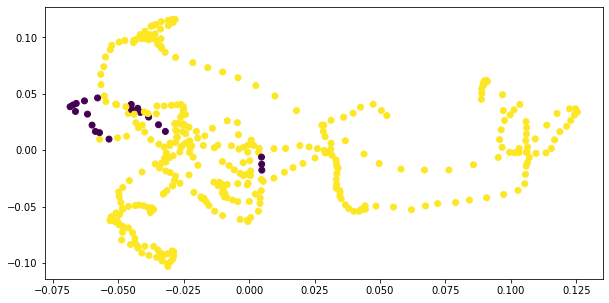

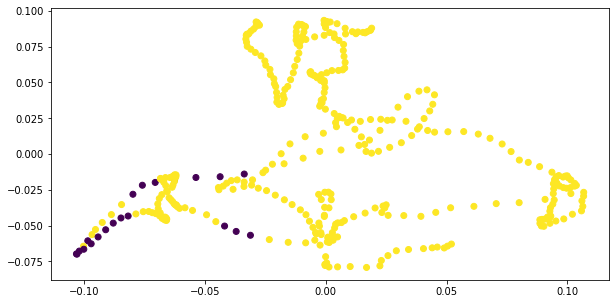

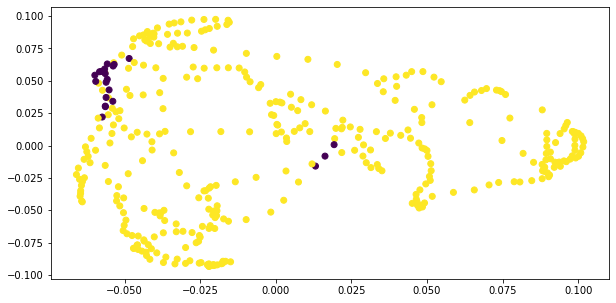

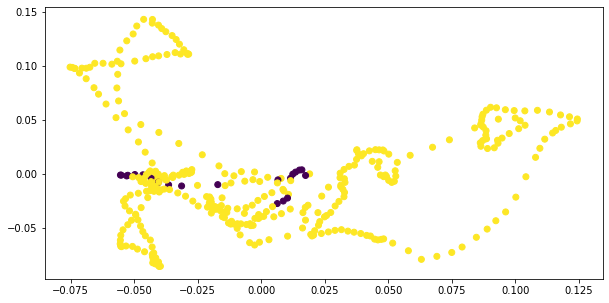

In [2553]:
n_components = 3

transformer = KernelPCA(n_components = n_components, kernel='rbf', fit_inverse_transform=True, gamma = 0.1)
X_kpca = transformer.fit_transform(X)
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.scatter(transformer.alphas_[:,0], transformer.alphas_[:,1], c=cluster_dataframe['label_monk'])

# Uniform
transformer_uniform = KernelPCA(n_components = n_components, kernel='rbf', fit_inverse_transform=True, gamma = .1)
X_kpca = transformer_uniform.fit_transform(X_uniform)
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.scatter(transformer_uniform.alphas_[:,0], transformer_uniform.alphas_[:,1], c=cluster_dataframe['label_monk'])

# Sharpe
transformer_sharpe = KernelPCA(n_components = n_components, kernel='rbf', fit_inverse_transform=True, gamma = 10)
X_kpca = transformer_sharpe.fit_transform(X_sharpe)
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.scatter(transformer_sharpe.alphas_[:,0], transformer_sharpe.alphas_[:,1], c=cluster_dataframe['label_monk'])

# GMV
transformer_gmv = KernelPCA(n_components = n_components, kernel='rbf', fit_inverse_transform=True, gamma = 0.8)
X_kpca = transformer_gmv.fit_transform(X_gmv)
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.scatter(transformer_gmv.alphas_[:,0], transformer_gmv.alphas_[:,1], c=cluster_dataframe['label_monk'])

Lasso classification

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate 
from sklearn import metrics

def lassolog(X, y, cv):

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    index = np.random.RandomState(seed=42).permutation(X_scaled.shape[0])
    X_scaled = X_scaled[index]
    y_perm = y[index]

    Cs = np.exp(np.linspace(-2, 1, 100))
    auc = []
    auc_std = []
    f1 = []
    f1_std = []
    scoring = {"roc_auc":"roc_auc","f1":"f1"}
    for c in Cs:
        clf_lasso = LogisticRegression(penalty='l1', C=c, solver='liblinear', class_weight = 'balanced')
        scores = cross_validate(clf_lasso, X_scaled, y_perm, cv=cv, scoring=scoring)
        auc.append(np.mean(scores['test_roc_auc']))
        auc_std.append(np.std(scores['test_roc_auc']))
        f1.append(np.mean(scores['test_f1']))
        f1_std.append(np.std(scores['test_f1']))

    auc_std = np.array(auc_std)
    auc = np.array(auc)
    f1 = np.array(f1)
    f1_std = np.array(f1_std)

    fig, ax = plt.subplots(1,2, figsize = (15,5))
    ax[0].plot(Cs, auc)
    ax[0].fill_between(Cs, (auc - auc_std), (auc + auc_std), color='blue', alpha=0.1)
    ax[1].plot(Cs, f1)
    ax[1].fill_between(Cs, (f1 - f1_std), (f1 + f1_std), color='blue', alpha=0.1)

    print(auc[auc == np.max(auc)])
    print(auc_std[auc == np.max(auc)])


    # 1std rule
    def find_nearest(array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return idx

    i = np.where(auc == np.max(auc))[0][0]
    auc_1std = auc[i]-auc_std[i]

    print(Cs[auc == np.max(auc)][0])
    clf_lasso_best = LogisticRegression(penalty='l1', C=Cs[find_nearest(auc, auc_1std)], solver='liblinear', class_weight = 'balanced').fit(X_scaled, y_perm)
    print(clf_lasso_best.coef_[0,clf_lasso_best.coef_ [0,:]!= 0])
    print(X.columns[clf_lasso_best.coef_ [0,:]!= 0])




    X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_perm,test_size=0.33, random_state=44)
    clf_train = LogisticRegression(penalty='l1', C=Cs[find_nearest(auc, auc_1std)], solver='liblinear',  class_weight = 'balanced').fit(X_train, y_train)
    y_pred_proba = clf_train.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc_test = metrics.roc_auc_score(y_test, y_pred_proba)

    fig, ax = plt.subplots(1,1, figsize = (7,5))
    ax.plot(fpr,tpr,label="data 1, auc="+str(auc_test))
    ax.plot([0,1],[0,1])
    ax.legend(loc=4)

[0.77477938]
[0.03201213]
2.558430384497103
[-0.1533515  -0.07663264  0.61255375  0.29038836  0.87496789 -0.46253653
  0.04764537 -0.18934397  0.10446548]
Index(['uniformcov_div', 'uniformomega', 'uniformtreynor', 'sharpecov_div',
       'sharpetreynor', 'sharpemax_draw', 'gmvcov_div', 'gmvvar_div',
       'gmvtreynor'],
      dtype='object')


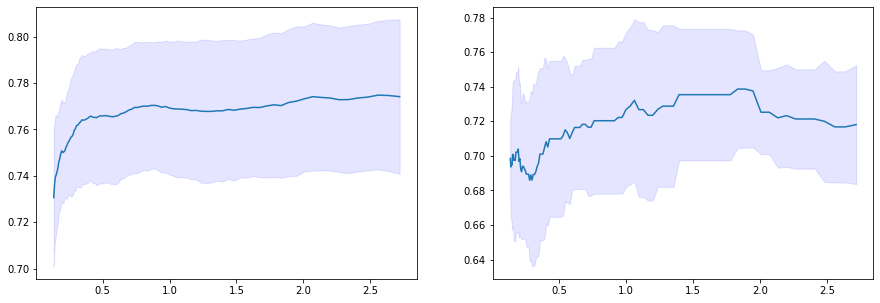

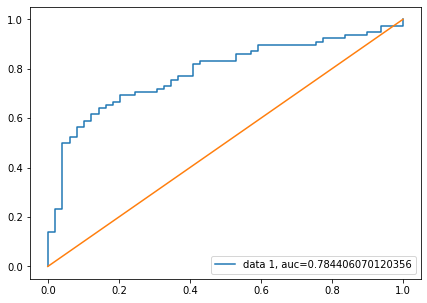

In [56]:

lassolog(X,y,3)




In [57]:

np.sum(0 == y)


164

Classification only uniform

[0.65063535]
[0.04981835]
1.7784773480143699
[-0.03907243 -0.05333593 -0.10668088  0.45268813]
Index(['uniformcov_div', 'uniformvar_div', 'uniformomega', 'uniformtreynor'], dtype='object')


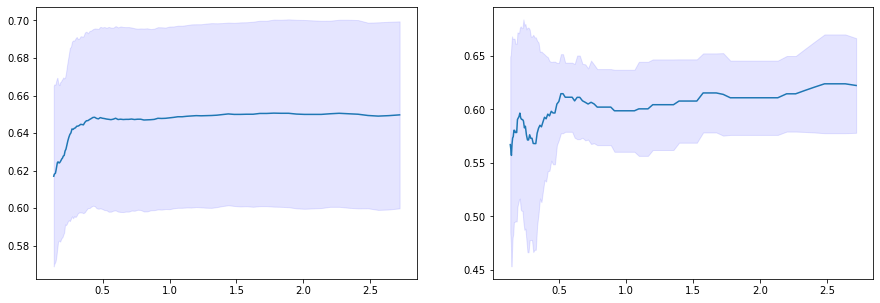

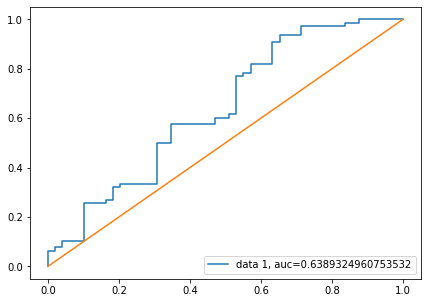

In [58]:

lassolog(X_uniform,y,3)

GMV

[0.75523088]
[0.11921385]
0.4548085181321939
[0.717402   1.02543792 0.24196564]
Index(['gmvcov_div', 'gmvvar_div', 'gmvtreynor'], dtype='object')


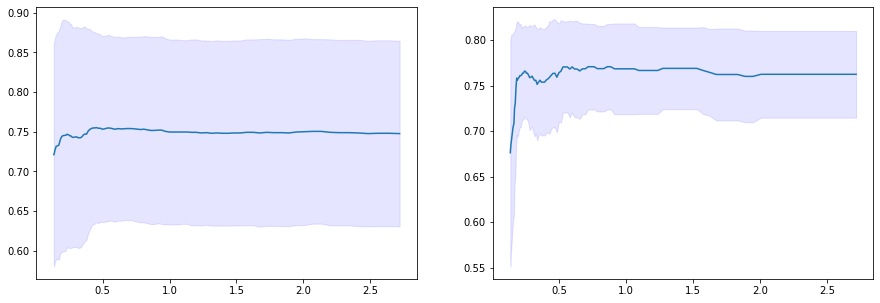

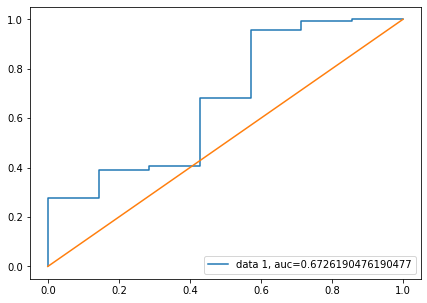

In [2559]:
lassolog(X_gmv,y,3)

Sharpe

[0.9365932 0.9365932]
[0.03721988 0.03721988]
2.637145203350768
[ 0.51018394  1.57595149 -0.985277   -0.83027551]
Index(['sharpecov_div', 'sharpevar_div', 'sharpesortino', 'sharpetreynor'], dtype='object')


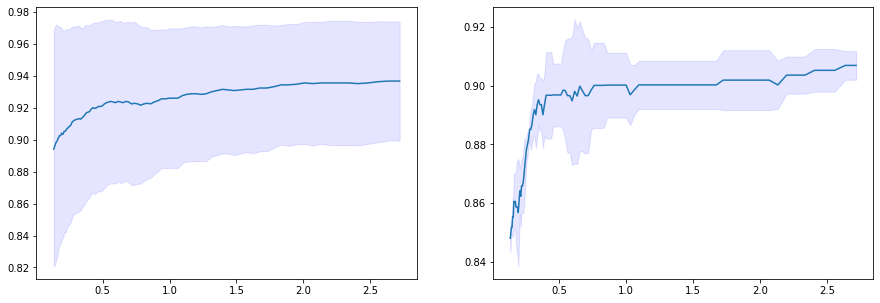

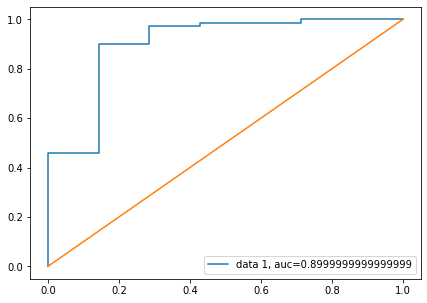

In [2560]:
lassolog(X_sharpe,y,3)

Analyze lasso regression using clustering

In [77]:
lasso_result = pd.read_csv('../data/lasso_result.txt', sep="&")
lasso_result[lasso_result == "x"] = 1
lasso_result[pd.isna(lasso_result)] = 0

In [78]:
top_feature = lasso_result[['DR_pew', 'DV_pew', 'S_pew', 'MDD_pew', 'O_pew',
       'ST_pew', 'TR_pew', 'DR_gmv', 'DV_gmv', 'S_gmv', 'MDD_gmv', 'O_gmv',
       'ST_gmv', 'TR_gmv', 'DR_ms', 'DV_ms', 'S_ms', 'MDD_ms', 'O_ms', 'ST_ms',
       'TR_ms']].agg('sum')
top_feature.sort_values(ascending=False)

MDD_pew    53
DR_pew     49
DV_pew     49
MDD_gmv    48
TR_ms      44
DV_gmv     44
DR_gmv     42
DV_ms      42
DR_ms      42
MDD_ms     41
TR_pew     40
TR_gmv     35
O_ms       23
O_pew      20
S_gmv      19
ST_ms      19
S_ms       18
S_pew      18
O_gmv      15
ST_pew     12
ST_gmv     11
dtype: object

In [79]:


pd.options.display.max_columns = None
top_feature_per_kernel = lasso_result[['Kernel','DR_pew', 'DV_pew', 'S_pew', 'MDD_pew', 'O_pew',
       'ST_pew', 'TR_pew', 'DR_gmv', 'DV_gmv', 'S_gmv', 'MDD_gmv', 'O_gmv',
       'ST_gmv', 'TR_gmv', 'DR_ms', 'DV_ms', 'S_ms', 'MDD_ms', 'O_ms', 'ST_ms',
       'TR_ms']].groupby('Kernel').agg('sum')
display(top_feature_per_kernel)

,DR_pew,DV_pew,S_pew,MDD_pew,O_pew,ST_pew,TR_pew,DR_gmv,DV_gmv,S_gmv,MDD_gmv,O_gmv,ST_gmv,TR_gmv,DR_ms,DV_ms,S_ms,MDD_ms,O_ms,ST_ms,TR_ms
Kernel,,,,,,,,,,,,,,,,,,,,,
Prop,10,11,4,10,5,2,9,8,10,5,9,3,1,7,6,11,5,9,3,3,8
RW,9,8,3,10,4,1,6,8,8,3,11,3,1,6,7,7,4,8,4,2,8
RWattr,10,10,4,11,4,4,7,7,10,2,10,3,3,8,9,9,2,5,6,3,9
SP,10,10,3,11,3,4,10,9,7,8,9,2,3,7,11,9,5,9,6,6,9
WL,10,10,4,11,4,1,8,10,9,1,9,4,3,7,9,6,2,10,4,5,10


In [80]:
hamming = pd.read_csv('../data/lasso_result.txt', sep="&")
hamming[hamming == "x"] = "1"
hamming[pd.isna(hamming)] = "0"
hamming = hamming.loc[hamming['Kernel'] == 'RW']
hamming['string'] =  hamming[['DR_pew', 'DV_pew', 'S_pew', 'MDD_pew', 'O_pew',
       'ST_pew', 'TR_pew', 'DR_gmv', 'DV_gmv', 'S_gmv', 'MDD_gmv', 'O_gmv',
       'ST_gmv', 'TR_gmv', 'DR_ms', 'DV_ms', 'S_ms', 'MDD_ms', 'O_ms', 'ST_ms',
       'TR_ms']].sum(1)
hamming

,Sector,Kernel,DR_pew,DV_pew,S_pew,MDD_pew,O_pew,ST_pew,TR_pew,DR_gmv,DV_gmv,S_gmv,MDD_gmv,O_gmv,ST_gmv,TR_gmv,DR_ms,DV_ms,S_ms,MDD_ms,O_ms,ST_ms,TR_ms,string
0,Global,RW,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1.111000e+20
5,Utilities,RW,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,1,1.000000e+20
10,Materials,RW,1,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1.101001e+20
15,Industrial,RW,1,1,1,1,1,0,1,1,1,0,1,0,1,1,0,1,0,1,1,0,0,1.111101e+20
20,Energy,RW,0,1,0,1,1,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,1.011010e+19
25,Communication,RW,1,1,0,1,1,0,1,0,1,1,1,0,0,1,1,0,0,1,0,1,1,1.101101e+20
30,Cyclical,RW,1,1,0,1,0,1,0,0,1,0,1,0,0,1,1,1,1,0,1,0,0,1.101010e+20
35,Defensive,RW,1,0,1,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1.011001e+20
40,Estate,RW,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1.101001e+20
45,Technology,RW,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,1,0,0,0,0,1,1.001001e+19


<AxesSubplot:>

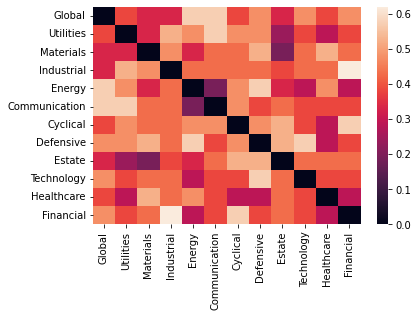

In [81]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(hamming[['DR_pew', 'DV_pew', 'S_pew', 'MDD_pew', 'O_pew',
       'ST_pew', 'TR_pew', 'DR_gmv', 'DV_gmv', 'S_gmv', 'MDD_gmv', 'O_gmv',
       'ST_gmv', 'TR_gmv', 'DR_ms', 'DV_ms', 'S_ms', 'MDD_ms', 'O_ms', 'ST_ms',
       'TR_ms']], metric = 'hamming')
from scipy.cluster.hierarchy import dendrogram, linkage
sns.heatmap(D, xticklabels=hamming['Sector'], yticklabels=hamming['Sector'])


In [84]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(affinity='precomputed', n_clusters=3, linkage='complete').fit(D)
print(model.labels_)
print(hamming['Sector'])

[1 0 2 1 2 2 1 0 2 1 0 0]
0            Global
5         Utilities
10        Materials
15       Industrial
20           Energy
25    Communication
30         Cyclical
35        Defensive
40           Estate
45       Technology
50       Healthcare
55        Financial
Name: Sector, dtype: object


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [60.0, 60.0, 100.0, 100.0],
  [20.0, 20.0, 80.0, 80.0]],
 'dcoord': [[0.0, 0.2857142857142857, 0.2857142857142857, 0.0],
  [0.0, 0.38095238095238093, 0.38095238095238093, 0.0],
  [0.2857142857142857,
   0.47619047619047616,
   0.47619047619047616,
   0.38095238095238093],
  [0.0, 0.19047619047619047, 0.19047619047619047, 0.0],
  [0.0, 0.19047619047619047, 0.19047619047619047, 0.0],
  [0.19047619047619047,
   0.42857142857142855,
   0.42857142857142855,
   0.19047619047619047],
  [0.0, 0.3333333333333333, 0.3333333333333333, 0.0],
  [0.0, 0.38095238095238093, 0.38095238095238093, 0.0],
  [0.3333333333333333,
   0.47619047619047616,
   0.47619047619047616,
   0.38095238095238093],
  [0.42857142857142855,
   0.571428571428571

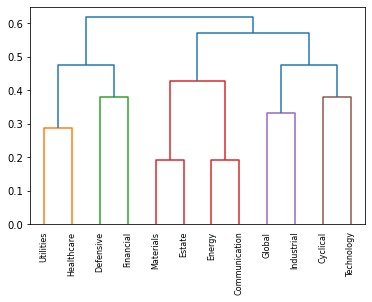

In [91]:
linked = linkage(hamming[['DR_pew', 'DV_pew', 'S_pew', 'MDD_pew', 'O_pew',
       'ST_pew', 'TR_pew', 'DR_gmv', 'DV_gmv', 'S_gmv', 'MDD_gmv', 'O_gmv',
       'ST_gmv', 'TR_gmv', 'DR_ms', 'DV_ms', 'S_ms', 'MDD_ms', 'O_ms', 'ST_ms',
       'TR_ms']], method = 'complete', metric = 'hamming')
dendrogram(linked, labels = np.array(hamming['Sector']), leaf_rotation=90, leaf_font_size=8)

 # SVM





In [92]:
from matplotlib.pyplot import axvline
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def svm(X, y, cv, gamma ):

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    index = np.random.RandomState(seed=42).permutation(X_scaled.shape[0])
    X_scaled = X_scaled[index]
    y_perm = y[index]

    Cs = np.exp(np.linspace(-3, 2, 100))
    auc = []
    auc_std = []
    f1 = []
    f1_std = []
    scoring = {"roc_auc":"roc_auc","f1":"f1"}
    for c in Cs:
        clf_svm = SVC(C=c, kernel='rbf', gamma = gamma, class_weight = 'balanced')
        scores = cross_validate(clf_svm, X_scaled, y_perm, cv=cv, scoring=scoring)
        auc.append(np.mean(scores['test_roc_auc']))
        auc_std.append(np.std(scores['test_roc_auc']))
        f1.append(np.mean(scores['test_f1']))
        f1_std.append(np.std(scores['test_f1']))

    auc_std = np.array(auc_std)
    auc = np.array(auc)
    f1 = np.array(f1)
    f1_std = np.array(f1_std)

    fig, ax = plt.subplots(1,2, figsize = (15,5))
    ax[0].plot(Cs, auc)
    ax[0].fill_between(Cs, (auc - auc_std), (auc + auc_std), color='blue', alpha=0.1)
    ax[1].plot(Cs, f1)
    ax[1].fill_between(Cs, (f1 - f1_std), (f1 + f1_std), color='blue', alpha=0.1)

    print(auc[auc == np.max(auc)])
    print(auc_std[auc == np.max(auc)])


    # 1std rule
    def find_nearest(array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return idx

    i = np.where(auc == np.max(auc))[0][0]
    auc_1std = auc[i]-auc_std[i]






    X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_perm,test_size=0.33, random_state=44)
    clf_train = SVC(kernel='rbf', C=Cs[find_nearest(auc, auc_1std)], class_weight = 'balanced',probability=True).fit(X_train, y_train)
    y_pred_proba = clf_train.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc_test = metrics.roc_auc_score(y_test, y_pred_proba)

    fig, ax = plt.subplots(1,1, figsize = (7,5))
    ax.plot(fpr,tpr,label="data 1, auc="+str(auc_test))
    ax.plot([0,1],[0,1])
    ax.legend(loc=4)

all

[0.83735375]
[0.01441785]


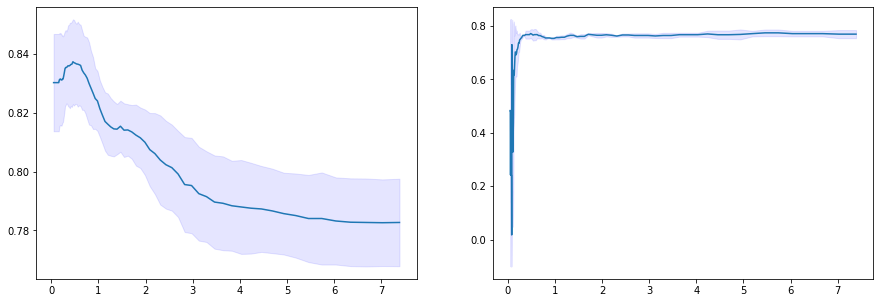

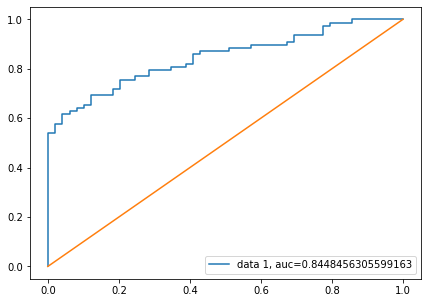

In [93]:
svm(X,y,3,1)

uniform

[0.9952381]
[0.00673435]


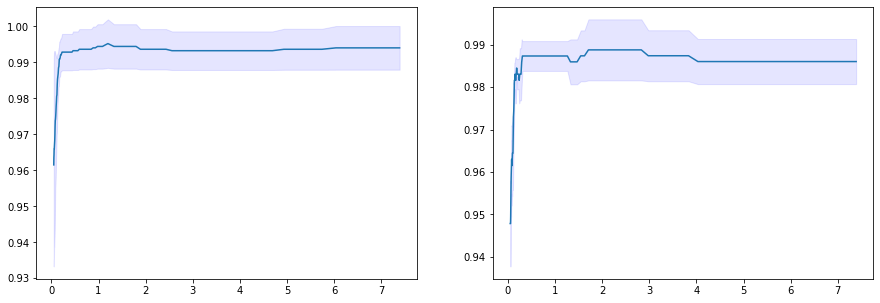

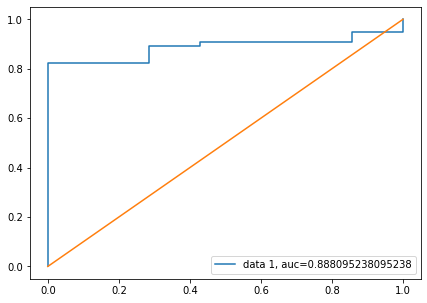

In [2563]:
svm(X_uniform,y,3,1)

gmv

[0.99247344 0.99247344]
[0.00755497 0.00755497]


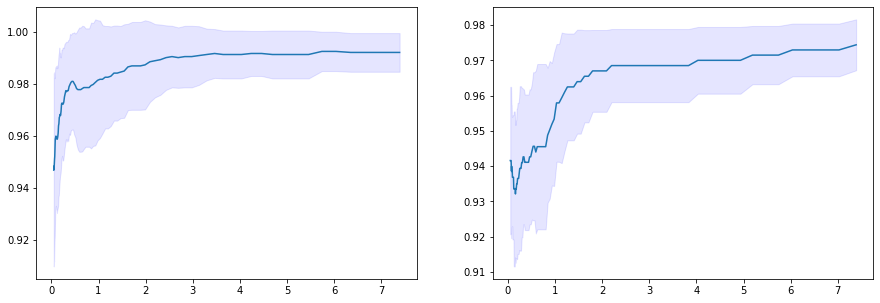

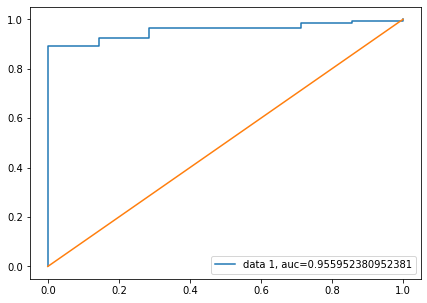

In [2564]:
svm(X_gmv,y,3,1)

 Sharpe

[0.99405746 0.99405746 0.99405746]
[0.00258085 0.00258085 0.0019561 ]


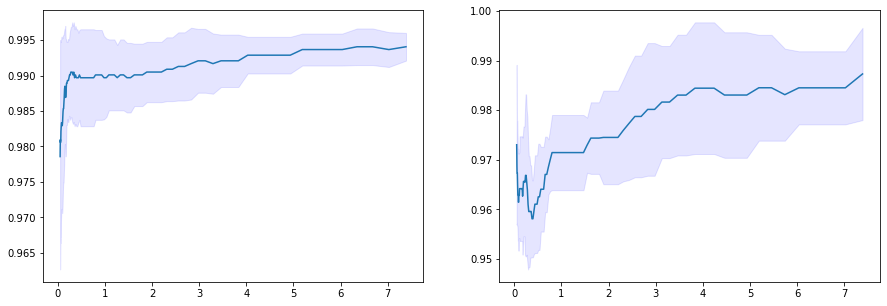

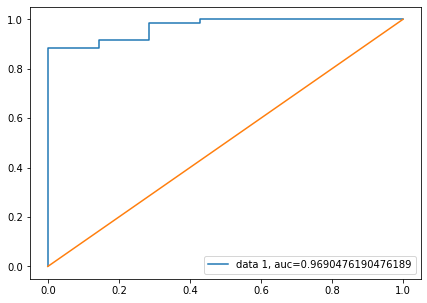

In [2565]:
svm(X_sharpe,y,3,1)